# The Birthday Problem 

In [1]:
from random import randint
import pandas as pd

In [2]:
min_people = 2
max_people = 99
possible_bdays = 365

### Define a function that produces a random birthday 

In [3]:
def produce_rand_bday():
    bday = randint(1, possible_bdays)
    return bday

### Generate many random birthdays

In [4]:
def produce_n_bdays(n):
    bdays = [produce_rand_bday() for _ in range(n)]
    return bdays

### Define a function that produces coincident birthdays

In [5]:
def coincident_bdays(bdays):
    unique_bdays = set(bdays)
    
    num_bdays = len(bdays)
    num_unique_bdays = len(unique_bdays)
    same_bday = (num_bdays != num_unique_bdays)
    
    return same_bday

### Perform multiple trials and calculate the probabilities

In [6]:
trials = 10000
num_coincidents = 0 

In [7]:
def prob_estimate_n(n):
    num_coincidents = 0
    for _ in range(trials):
        bdays = produce_n_bdays(n)
        same_bday = coincident_bdays(bdays)
        if same_bday:
            num_coincidents += 1
            
    prob_same_bday =  num_coincidents / trials
    return prob_same_bday 

In [8]:
def prob_estimate_for_range(nr):
    n_probabilities = []
 
    for n in nr:
        prob_same_bday = prob_estimate_n(n)
        n_probabilities.append(prob_same_bday)
         
    return n_probabilities

In [9]:
nr = range(min_people, max_people + 1)
n_probabilities = prob_estimate_for_range(nr)

### Display the solution - Proof of prob at least 50% at 23 people

In [10]:
people_in_room = pd.Series(nr, name = 'n')
probability_of_same_bday = pd.Series(n_probabilities, name='probability')
df = pd.concat([people_in_room, probability_of_same_bday], axis=1)
df.iloc[18:28,:] 

,n,probability
18,20,0.4068
19,21,0.4437
20,22,0.4811
21,23,0.5065
22,24,0.5383
23,25,0.5794
24,26,0.6043
25,27,0.6349
26,28,0.6621
27,29,0.6915


### Plot the results

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np
from scipy.signal import savgol_filter

### Plot the results matching The Economist theme (no package for this) 

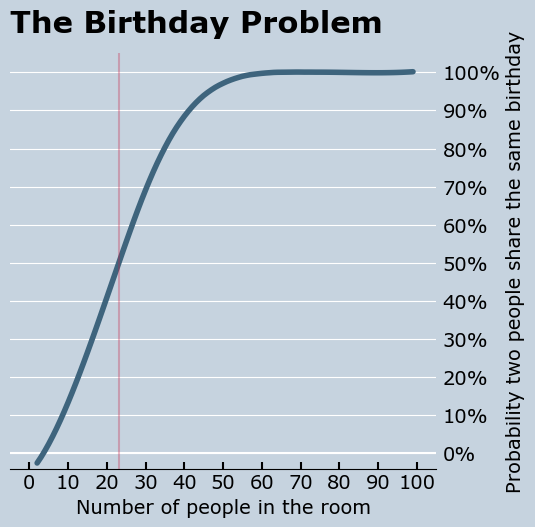

In [23]:
fig, prob_plot = plt.subplots(figsize=(5.5, 5.5), dpi=100, facecolor='#c6d3df') # basic figure
prob_plot.set_facecolor('#c6d3df')
hfont = {'fontname':'Verdana'}

# adjust the axis to match the theme
prob_plot.xaxis.set_tick_params(width=1.5, length=5, direction="in")
prob_plot.set(xlim=(-5,105), 
     ylim=(-0.04,1.05),
     xticks=[0,10,20,30,40,50,60,70,80,90,100], # set axis values 
     yticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]) 
prob_plot.yaxis.set_ticks_position("right")  # economist puts y label on the right
prob_plot.yaxis.set_label_position("right")
prob_plot.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
prob_plot.yaxis.grid(color='white', which='major') # they only use y axis grid lines 
plt.axhline(y=0, color='white') # there is a horizontal line missing at y=0 
prob_plot.tick_params(axis='y', pad=15) # the y-axis labels should not touch the grid lines, shift right

y_new = savgol_filter(n_probabilities, 51, 3) # make a smooth line

sns.lineplot(x=nr, y=y_new, lw=4, color='#3e647d', solid_capstyle='round') # make the line ends rounded

# adjust the axis lines in terms of length and visibility 
prob_plot.spines['top'].set_visible(False) 
prob_plot.spines['right'].set_position(('data', 100.01))
prob_plot.spines['right'].set_visible(False)
prob_plot.spines['bottom'].set_position(('data',-0.04))
prob_plot.spines['left'].set_visible(False)

# labels and other 
plt.plot([23, 23], [-0.04, 1.05], lw=1.5, color='#C91D42', alpha=0.3) # add the red line at the solution
plt.xlabel('Number of people in the room', fontsize=14, **hfont)
plt.ylabel('Probability two people share the same birthday', fontsize=14, rotation=90, **hfont)
plt.title("The Birthday Problem", fontsize=22, fontweight='bold', loc="left", pad=15, **hfont) 
plt.tick_params(right = False, bottom = True)
plt.yticks(fontsize=14, **hfont)
plt.xticks(fontsize=14, **hfont)

plt.savefig('Python_birthdayproblem_graph.png',bbox_inches='tight')  

plt.show()